In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22500\3419160234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#creating object of lable encoder , we have to create separate object for each cols if there are many cols to encode 
le_sex = LabelEncoder()

In [7]:
X = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)
y = df['Survived']

In [8]:
X.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [9]:
X['Sex_le'] = le_sex.fit_transform(X['Sex'])
X.head()

# male = 1, female = 0

,Survived,Pclass,Sex,Age,Fare,Sex_le
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [10]:
X1 = X.drop(['Sex','Survived'],axis=1)
X1.head()

,Pclass,Age,Fare,Sex_le
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2,random_state=42)

In [12]:
model = tree.DecisionTreeClassifier(max_depth=5)

In [13]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [14]:
X_train.head()

,Pclass,Age,Fare,Sex_le
331,1,45.5,28.5000,1
733,2,23.0,13.0000,1
382,3,32.0,7.9250,1
704,3,26.0,7.8542,1
813,3,6.0,31.2750,0


In [15]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [16]:
model.predict([[1,45.5,28.5000,0]])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

[Text(0.5030487804878049, 0.9166666666666666, 'x[3] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.2804878048780488, 0.75, 'x[0] <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]'),
 Text(0.10975609756097561, 0.5833333333333334, 'x[1] <= 2.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(0.04878048780487805, 0.4166666666666667, 'x[2] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.024390243902439025, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07317073170731707, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.17073170731707318, 0.4166666666666667, 'x[1] <= 27.5\ngini = 0.061\nsamples = 128\nvalue = [4, 124]'),
 Text(0.12195121951219512, 0.25, 'x[1] <= 24.5\ngini = 0.12\nsamples = 47\nvalue = [3.0, 44.0]'),
 Text(0.0975609756097561, 0.08333333333333333, 'gini = 0.048\nsamples = 41\nvalue = [1, 40]'),
 Text(0.14634146341463414, 0.08333333333333333, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.219512195121951

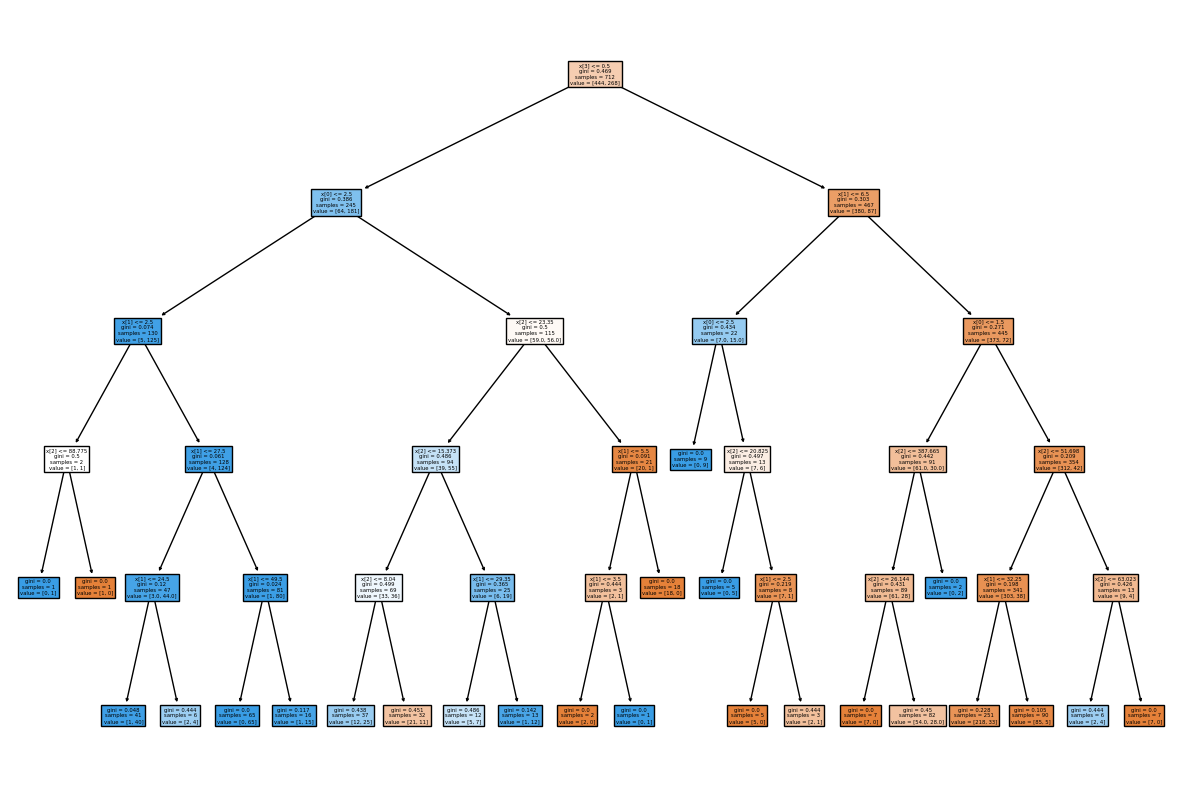

In [17]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [18]:
y_pred = model.predict(X_test)

In [19]:
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

Accuracy : 0.8044692737430168


In [20]:
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



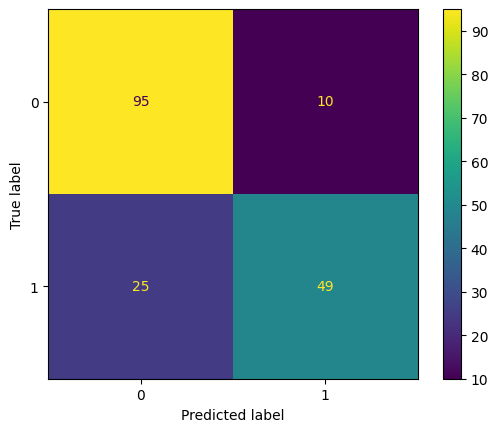

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [24]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

grid = GridSearchCV(model,param_grid=parameter,cv=5,scoring='accuracy')

In [25]:
grid.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py"

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [26]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [27]:
y_pred_grid = grid.predict(X_test)

In [29]:
score = accuracy_score(y_test,y_pred_grid)
print('Accuracy:',score)

Accuracy: 0.8268156424581006


              precision    recall  f1-score   support

           0       0.90      0.82      0.86       114
           1       0.73      0.83      0.78        65

    accuracy                           0.83       179
   macro avg       0.81      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



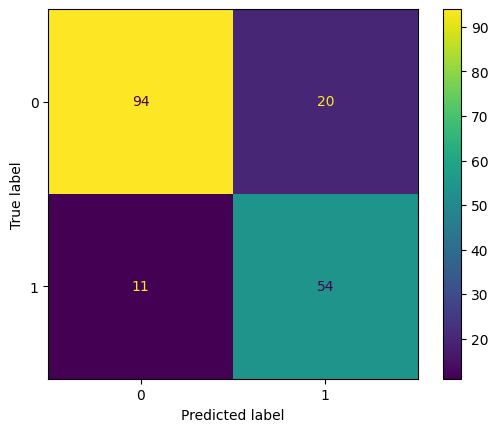

In [31]:
cm = confusion_matrix(y_pred_grid,y_test)
print(classification_report(y_pred_grid,y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()